<a href="https://colab.research.google.com/github/seeun7/linear/blob/main/iris_s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

202310954 이세은 선형대수학2 붓꽃 분류 과제

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [79]:
def convert_y(y, length):
    y_=np.zeros((len(y), length))
    for i in range(len(y)):
        y_[i,y[i]]=1
    return y_ #y값을 벡터로 변환
def compute_acc(y_test, y_pred):
    size=y_test.shape[0]
    count=0
    for i in range(size):
        diff=abs(np.argmax(y_test[i,:])-np.argmax(y_pred[i,:]))
        if diff !=0:
            count+=1
    return 100-count*100.0/size #정확도 계산 함수
def sigmoid(x):
    return 1/(1+np.exp(-x)) #시그모이드 함수
def sigmoid_derivative(x):
    return sigmoid(x)*(1-sigmoid(x)) #역전파알고리즘에 필요함
def feed_forward(x, W1, W2, b1, b2):
    a1=x

    z2=np.dot(W1, a1)+b1
    a2=sigmoid(z2)

    z3=np.dot(W2, a2)+b2
    a3=sigmoid(z3)

    return a1, a2, a3, z2, z3 #피드포워드

In [83]:
def train(X,Y, node_size, max_iteration, learning_rate):
    #무작위 값을 가중치로 사용
    W2=np.random.random((node_size['output_layer_size'],node_size['hidden_layer_size']))
    W1=np.random.random((node_size['hidden_layer_size'],node_size['input_layer_size']))
    b2=np.random.random(node_size['output_layer_size'])
    b1=np.random.random(node_size['hidden_layer_size'])
    size=len(Y)
    average_cost_lst=[]
    accuracy_lst=[]
    count=0

    while count < max_iteration:
        dW2=np.zeros((node_size['output_layer_size'], node_size['hidden_layer_size']))
        dW1=np.zeros((node_size['hidden_layer_size'], node_size['input_layer_size']))
        db2=np.zeros((node_size['output_layer_size']))
        db1=np.zeros((node_size['hidden_layer_size']))
        average_cost=0
        #피드포워드와 역전파 알고리즘을 이용해 특성과 라벨 학습
        for x,y in zip(X,Y):
            a1,a2,a3,z2,z3=feed_forward(x, W1, W2 ,b1 ,b2)
            out_error=y-a3
            delta3=-(out_error)*sigmoid_derivative(z3)
            average_cost += np.linalg.norm((out_error), 2)/size
            h_error=np.dot(W2.T, delta3)
            delta2=h_error*sigmoid_derivative(z2)
            dW2 += np.dot(delta3[:,np.newaxis], np.transpose(a2[:,np.newaxis]))/size
            db2 += delta3/size
            dW1 += np.dot(delta2[:,np.newaxis], np.transpose(a1[:,np.newaxis]))/size
            db1 += delta2/size
        W2 += -learning_rate*dW2
        b2 += -learning_rate*db2
        W1 += -learning_rate*dW1
        b1 += -learning_rate*db1
        y_pred=predict_y(X, W1, W2, b1, b2)
        accuracy=compute_acc(Y, y_pred)
        accuracy_lst.append(accuracy)
        average_cost_lst.append(average_cost) #측정된 accuracy, cost 저장
        count += 1
    return W1, W2, b1, b2, average_cost_lst,accuracy_lst

In [84]:
def predict_y(X, W1, W2, b1, b2):

    dataset_size=X.shape[0]

    y=np.zeros((dataset_size, 3))

    for i in range(dataset_size):
        a1,a2,a3,z2,z3 = feed_forward(X[i,:],W1,W2,b1,b2)
        y[i]=a3
    return y

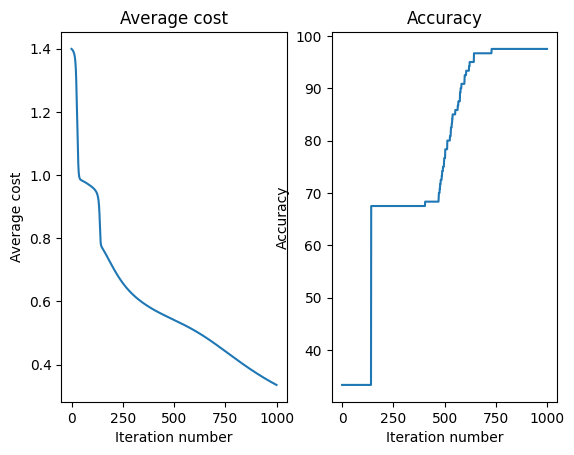

In [86]:
Species_Dict={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}

X=[]
Y=[]

with open('Iris.csv', newline='') as file:
    reader=csv.reader(file)
    try:
        for i, row in enumerate(reader):
            if i>0:
                #csv로부터 읽어온 데이터를 리스트에 저장
                X.append(np.array(row[1:5], dtype="float64"))
                Y.append(Species_Dict[row[-1]])

        #데이터가 저장된 리스트를 넘파이 배열로 변환합니다
        X=np.array(X)
        Y=np.array(Y)

    except csv.Error as e:
        sys.exit('file {}, line {}: {}'.format(filename, reader.line_num, e))

Y=convert_y(Y, length=3)

s=np.arange(Y.shape[0])
np.random.seed(0)
np.random.shuffle(s)

Y=Y[s]
X=X[s]
#학습용 데이터와 테스트용 데이터를 8:2 비율로 사용
size=len(Y)
p=int(size * 0.8)
X_train=X[0:p]
Y_train=Y[0:p]
X_test=X[p:]
Y_test=Y[p:]
node_size={'input_layer_size':4, 'hidden_layer_size':8, 'output_layer_size':3}
learning_rate=0.5
W1, W2, b1, b2, list_avg_cost, list_accuracy=train(X_train, Y_train, node_size=node_size, max_iteration=1000, learning_rate=learning_rate)
Figure, ax=plt.subplots(1, 2)
ax[0].title.set_text('Average cost')
ax[1].title.set_text('Accuracy')
ax[0].plot(list_avg_cost)
ax[1].plot(list_accuracy)
ax[0].set_ylabel('Average cost')
ax[0].set_xlabel('Iteration number')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Iteration number')
plt.show()